<center>
<table ><tr><td valign='center' bgcolor='white'>
  <a href="https://web.facebook.com/DAT.KUSRC/" target="_blank"><img src="https://drive.google.com/uc?id=1dNBiKikzW1-osi6lleLOgSOKQ65IIfMC" height="50px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://www.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1ZfGOBmxAwg8SAhyseFziyinzxBGme78a" height="80px"></a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
</td><td valign='center' bgcolor='white'>
  <a href="https://mike.cpe.ku.ac.th/" target="_blank"><img src="https://drive.google.com/uc?id=1s6r3iG_Slpu_NSWqdt5zBp8Z9hV0-zh6" height="50px"></a>
</td></tr></table>
</center>

<center><h1><b>Machine Learning: Classification</b></h1></center>

---

### **Classification using scikit-learn (with pandas)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #วัดความเเม่นยำข้อมูล
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Now, define your path of the input files
data_path = '/content/drive/My Drive/ML/'

In [ ]:
# Read Cities.csv into dataframe, add column for temperature category
f = open(data_path + 'Cities.csv')
cities = pd.read_csv(f)
cities

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62
...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02
209,Zaragoza,Spain,41.65,-0.89,14.17
210,Zhytomyr,Ukraine,50.25,28.66,6.67
211,Zonguldak,Turkey,41.43,31.78,10.64


In [ ]:
# Create a label for each instance
cats = []
temps = cities.temperature
for temp in temps:
    if temp < 5:
        cats.append('cold')
    elif temp < 9:
        cats.append('cool')
    elif temp < 15:
        cats.append('warm')
    else:
        cats.append('hot')
cities['category'] = cats
cities

,city,country,latitude,longitude,temperature,category
0,Aalborg,Denmark,57.03,9.92,7.52,cool
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,cool
2,Abisko,Sweden,63.35,18.83,0.20,cold
3,Adana,Turkey,36.99,35.32,18.67,hot
4,Albacete,Spain,39.00,-1.87,12.62,warm
...,...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02,warm
209,Zaragoza,Spain,41.65,-0.89,14.17,warm
210,Zhytomyr,Ukraine,50.25,28.66,6.67,cool
211,Zonguldak,Turkey,41.43,31.78,10.64,warm


In [ ]:
print("cold:", len(cities[(cities.category == 'cold')]))
print("cool:", len(cities[(cities.category == 'cool')]))
print("warm:", len(cities[(cities.category == 'warm')]))
print("hot:", len(cities[(cities.category == 'hot')]))

cold: 17
cool: 92
warm: 79
hot: 25


In [ ]:
# Create training and test sets for cities data
numitems = len(cities)
percenttrain = 0.85   #divi 85% from 213
 
# Change the value of "random_state" to fix to other random pattern
citiesTrain,citiesTest = train_test_split(cities, train_size=percenttrain, random_state=0) #split data   random_state = 0 สุ่มด้วย patten เดิม 1 คือเเตกต่าง

print('Training set', len(citiesTrain), 'items')
print('Test set', len(citiesTest), 'items')
print(citiesTrain)
print(citiesTest)

Training set 181 items
Test set 32 items
           city         country  latitude  longitude  temperature category
141       Milan           Italy     45.47       9.21         6.65     cool
97    Groningen     Netherlands     53.22       6.58         8.71     cool
136    Marbella           Spain     36.52      -4.88        17.19      hot
161       Pinsk         Belarus     52.13      26.09         6.42     cool
33   Birmingham  United Kingdom     52.47      -1.92         8.81     cool
..          ...             ...       ...        ...          ...      ...
67         Cork         Ireland     51.90      -8.50         9.41     warm
192      Tarsus          Turkey     36.92      34.88        11.21     warm
117    Klaipeda       Lithuania     55.72      21.12         7.00     cool
47        Brest         Belarus     52.10      23.70         6.73     cool
172     Rostock         Germany     54.07      12.15         8.07     cool

[181 rows x 6 columns]
            city         country  l

### **K-nearest-neighbors classification <sup>[<a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">1</a>]</sup>**

In [ ]:
# Predict temperature category from other features     knn deterministic k เดิม ค่าเดิม
features = ['longitude', 'latitude']
neighbors = 9
classifier = KNeighborsClassifier(neighbors)
classifier.fit(citiesTrain[features], citiesTrain['category'])

predictions = classifier.predict(citiesTest[features])
# predictions
# Calculate accuracy
for i in range(len(citiesTest)):  #เปรียบเทียบค่าทำนาย ค่าจริงเป็นอย่างไร
   print('Predicted:', predictions[i], ' Actual:', citiesTest['category'].iloc[i])

accuracy = accuracy_score(citiesTest['category'], predictions) #ค่าจริง  ค่าทำนาย   ค่าอยู่ระหว่าง 0-1
# print(accuracy)
print('Percent correct:', accuracy*100, '%')

# 1) Try to run several times and see the accuracy; Is it change?
# 2) Comment out print, play with other values for neighbors, try 'temperature'
#    as feature

Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: warm
Predicted: hot  Actual: hot
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cold
Predicted: warm  Actual: hot
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: hot  Actual: hot
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: cool  Actual: cool
Predicted: warm  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Percent correct: 75.0 %


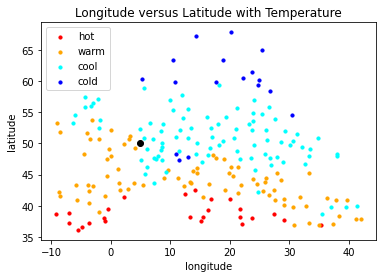

Predicted: cool


In [ ]:
# Set color for each category
c_dict = {'hot':'red', 'warm':'orange', 'cool':'cyan', 'cold':'blue'}

# Create plot
for c in c_dict:
    lats = cities[cities.category == c]['latitude']
    longs = cities[cities.category == c]['longitude']
    plt.scatter(longs, lats, color=c_dict[c], label=c, s=10)

#plot ghaph
#----------------------------------------------------------------------------
plt.scatter([5], [50], color='black') # sample item to predict category

plt.title('Longitude versus Latitude with Temperature')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(loc=2) #hot warm cool cold / ตำเเหน่ง
plt.show()



# Predict based on 9 neighbors
# predictions = classifier.predict([[5,50]])
predictions = classifier.predict(pd.DataFrame({'longitude':[5],'latitude':[50]}))
print('Predicted:', predictions[0])

### <font color="green">**Your Turn: K-nearest-neighbors on World Cup Data**</font> (10 Minutes)

In [ ]:
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# This box seperates the data into training and test sets.
f = data_path + 'Players.csv'
players = pd.read_csv(f)

percenttrain = 0.85
# Change the value of "random_state" to fix to other random pattern
playersTrain,playersTest = train_test_split(players, train_size=percenttrain, random_state=0)
print('Training set', len(playersTrain), 'items')
print('Test set', len(playersTest), 'items')
players


Training set 505 items
Test set 90 items


,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [23]:
from pandas.core.accessor import delegate_names
cats = []
temps = players.position
for temp in temps:
    if temp == 'midfielder':
        cats.append('CM')
    elif temp == 'defender':
        cats.append('CB')
    elif temp =='forward':
        cats.append('ST')
    else:
        cats.append('GK')
players['Style'] = cats
players

,surname,team,position,minutes,shots,passes,tackles,saves,Style
0,Abdoun,Algeria,midfielder,16,0,6,0,0,CM
1,Belhadj,Algeria,defender,270,1,146,8,0,CB
2,Boudebouz,Algeria,midfielder,74,3,28,1,0,CM
3,Bougherra,Algeria,defender,270,1,89,11,0,CB
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2,GK
...,...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0,CM
591,Howard,USA,goalkeeper,390,0,81,0,14,GK
592,Jozy Altidore,USA,forward,356,8,84,2,0,ST
593,Onyewu,USA,defender,170,1,69,2,0,CB


In [24]:
# This box does the classification.
# Try different features and different numbers of neighbors.
# What's the highest accuracy you can get?
# features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
features = ['position']
neighbors = 9

classifier = KNeighborsClassifier(neighbors)
classifier.fit(playersTrain[features], playersTrain['Style'])

predictions = classifier.predict(playersTest[features])
# predictions
# Calculate accuracy
for i in range(len(playersTest)):  #เปรียบเทียบค่าทำนาย ค่าจริงเป็นอย่างไร
   print('Predicted:', predictions[i], ' Actual:', playersTest['Style'].iloc[i])

accuracy = accuracy_score(playersTest['Style'], predictions) #ค่าจริง  ค่าทำนาย   ค่าอยู่ระหว่าง 0-1
# print(accuracy)
print('Percent correct:', accuracy*100, '%')

# 1) Try to run several times and see the accuracy; Is it change?
# 2) Comment out print, play with other values for neighbors, try 'temperature'
#    as feature

KeyError: ignored

### **Decision tree classification <sup>[<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">2</a>]</sup>**

In [ ]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
dt = DecisionTreeClassifier(min_samples_split=10) # parameter is optional  min_samples_split ถ้า 10    20 น้อย  ยับยั้งการเเตกกิ่ง
dt.fit(citiesTrain[features], citiesTrain['category'])  #train กับ lable

predictions = dt.predict(citiesTest[features]) #test predict

# Calculate accuracy
for i in range(len(citiesTest)):
   print('Predicted:', predictions[i], ' Actual:', citiesTest['category'].iloc[i])

accuracy = accuracy_score(citiesTest['category'], predictions)
print('Percent correct:', accuracy*100, '%')

# 1) Try to run several times and see the accuracy; Is it change?
# 2) Comment out print, play with other values for min_samples_split, try 'temperature'
#    as feature 

Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: cool
Predicted: warm  Actual: warm
Predicted: hot  Actual: hot
Predicted: hot  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: cool
Predicted: cool  Actual: cool
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: hot  Actual: warm
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: warm  Actual: warm
Predicted: cold  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: cool  Actual: cool
Predicted: warm  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Percent correct: 81.25 %


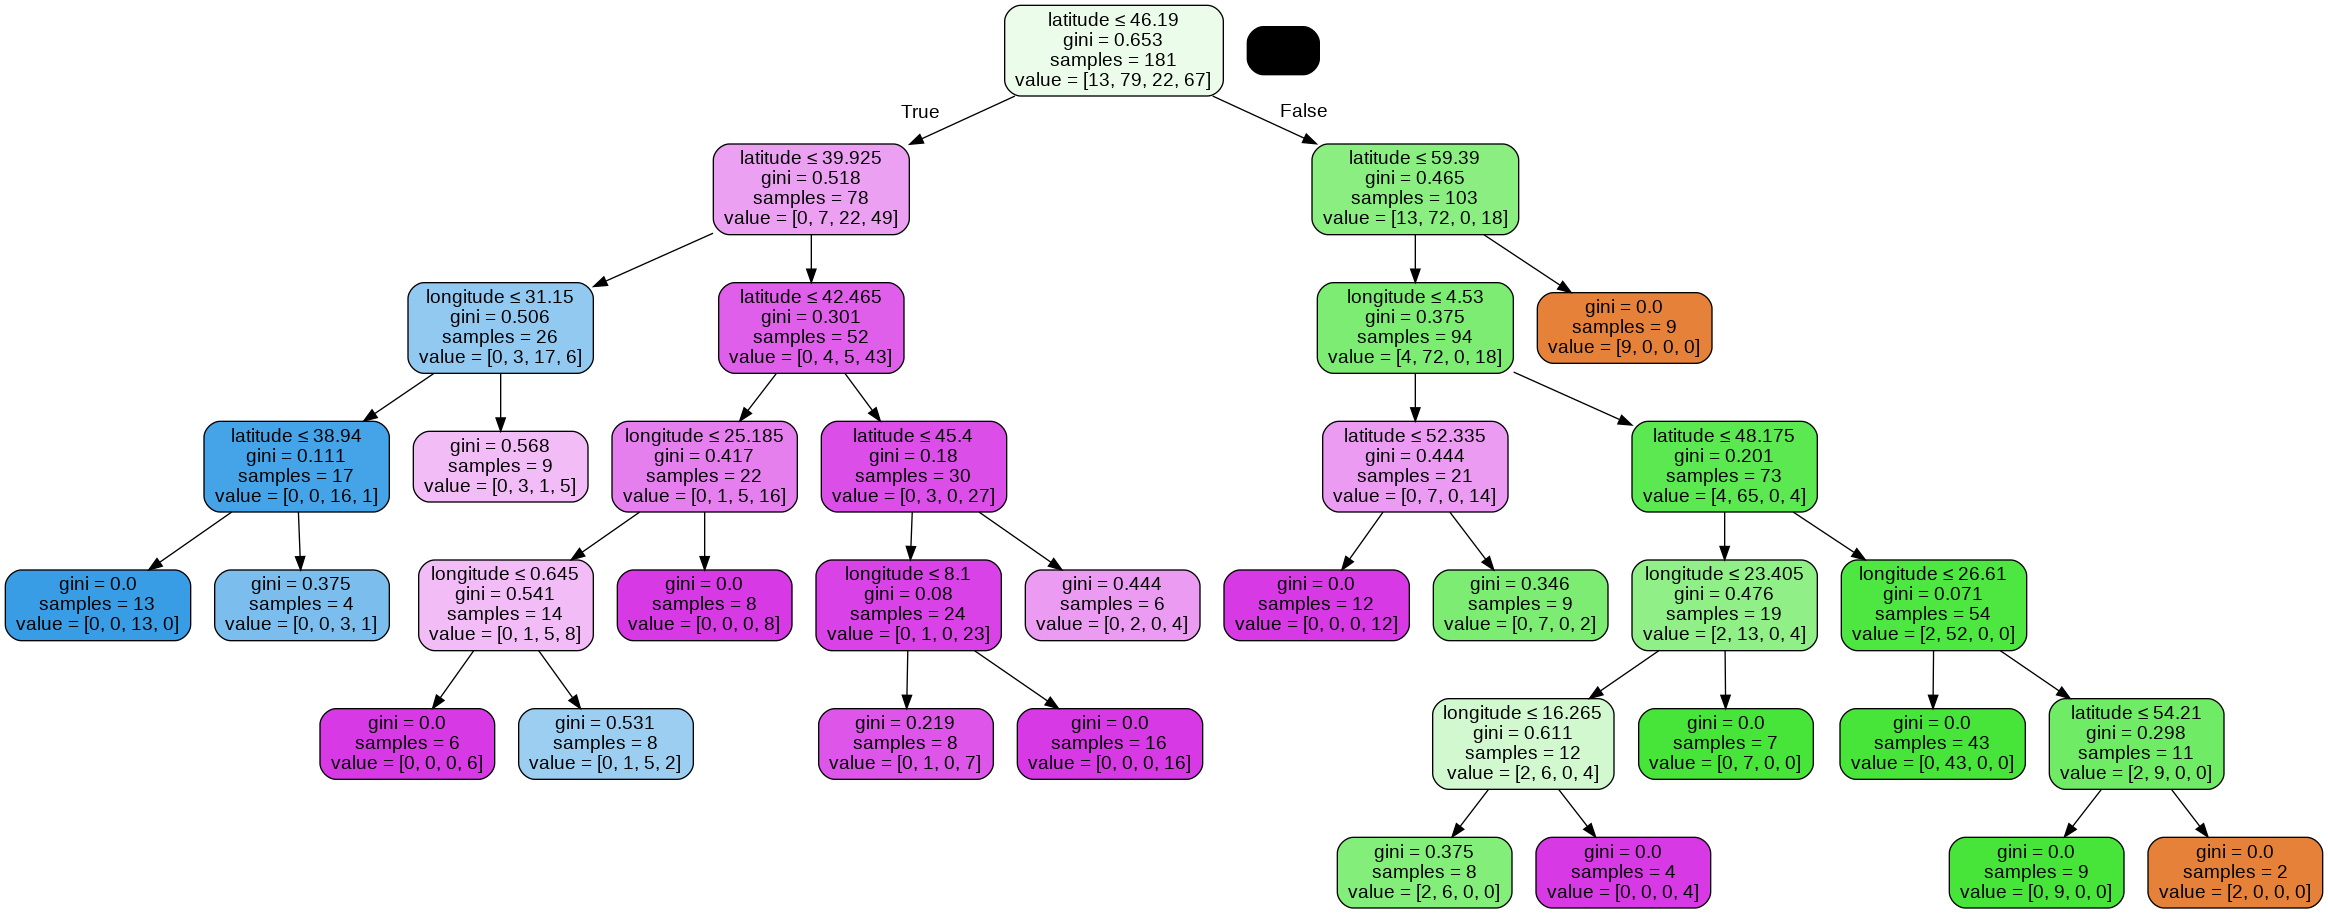

In [ ]:
# Visualize the tree model
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, feature_names = features,out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1500)

### **"Forest" of decision trees <sup>[<a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">3</a>]</sup>**

In [ ]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
rf = RandomForestClassifier(n_estimators=10) # number of different decision trees   parameter จำนวนต้นไม้ที่สุ่มมา
rf.fit(citiesTrain[features], citiesTrain['category'])

predictions = rf.predict(citiesTest[features])

# Calculate accuracy
for i in range(len(citiesTest)):
   print('Predicted:', predictions[i], ' Actual:', citiesTest['category'].iloc[i])

accuracy = accuracy_score(citiesTest['category'], predictions)
print('Percent correct:', accuracy*100, '%')

# 1) Try to run several times and see the accuracy; Is it change?
# 2) Comment out print, play with other values for n_estimators

Predicted: cool  Actual: warm
Predicted: cool  Actual: cool
Predicted: hot  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: cool
Predicted: warm  Actual: warm
Predicted: hot  Actual: hot
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: warm  Actual: cool
Predicted: warm  Actual: cool
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: hot  Actual: warm
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: warm  Actual: warm
Predicted: cold  Actual: cold
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: cool  Actual: cool
Predicted: warm  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Percent correct: 75.0 %


### <font color="green">**Your Turn: Decision tree and forest of trees on World Cup Data**</font> (10 Minutes)

In [ ]:
# SINGLE TREE
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# Try different features and different values for min_samples_split.
# What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']


In [ ]:
# FOREST OF TREES
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# Try different values for n_estimators.
# What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']


### **Naive Bayes classification <sup>[<a href="http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html" target="_blank">4</a>]</sup>**

In [ ]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
nb = GaussianNB()
nb.fit(citiesTrain[features], citiesTrain['category'])

predictions = nb.predict(citiesTest[features])

# Calculate accuracy
for i in range(len(citiesTest)):
   print('Predicted:', predictions[i], ' Actual:', citiesTest['category'].iloc[i])

accuracy = accuracy_score(citiesTest['category'], predictions)
print('Percent correct:', accuracy*100, '%')

# 1) Try to run several times and see the accuracy; Is it change?
# 2) Comment out print, try removing 'longitude'

Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: hot  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: cool
Predicted: warm  Actual: warm
Predicted: hot  Actual: hot
Predicted: hot  Actual: warm
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: hot  Actual: cool
Predicted: cool  Actual: cool
Predicted: cold  Actual: cold
Predicted: hot  Actual: hot
Predicted: hot  Actual: warm
Predicted: cool  Actual: cold
Predicted: hot  Actual: hot
Predicted: warm  Actual: warm
Predicted: cold  Actual: cold
Predicted: warm  Actual: warm
Predicted: cool  Actual: warm
Predicted: warm  Actual: warm
Predicted: cool  Actual: cool
Predicted: warm  Actual: warm
Predicted: cool  Actual: cold
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Predicted: cool  Actual: cool
Percent correct: 75.0 %


### <font color="green">**Your Turn: Naive Bayes on World Cup Data**</font> (10 Minutes)

In [ ]:
# Predict position from one or more of minutes, shots, passes, tackles, saves.
# Try different features. What's the highest accuracy you can get?
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']


## **Acknowledgement**

Most parts of this tutorial were originated from Prof. Jennifer Widom, Stanford University. Many thanks to her for providing a short-course and workshop in data science at Kasetsart University (Main Campus) in October 2016.

## **References**

[1] http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[2] http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[3] http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[4] http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html